## Exercise 1 <a name="Exercise-1"></a>

**Consider a gene whose expression is affected by a direct positive feedback, with Hill coefficient 2, maximum expression rate 1 nM/s, activation threshold 100 nM, and degradation rate 0.001 s-1. Integrate the differential equation that represents the dynamics of the concentration of the expressed protein, and determine the threshold value of the initial condition that separates the basins of attraction of the two coexisting equilibrium states of the system.** 

In [1]:
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
from IPython.display import Image

First, store the values given in the exercise in the corresponding variables:

In [2]:
# Hill coefficient
n=2
# Maximum expression rate
b=1
# Activation threshold
K = 100
# Degradation rate
y=0.001

Let's define the function which return dx/dt:

In [3]:
def dx_dt(x,t):
    """
    Positive feedback model, Hill Cooperativity. Ex1
    """
    dxdt = ((b*x**n)/(K**n+ x**n))-y*x
    return dxdt

Now define the time intervals and the initial conditios X0.

In [4]:
t = np.linspace(0, 15000, 1000)
x0=[9, 10, 11,1000]

Plot x in function of the time for each initial condition. In this exercises, the integration will be done with scipy.integrate.odeint, which takes three arguments in this occasion: a function name that returns derivative values at requested y and t values (dx_dt), the initial conditions of the differential states (x), and the time points at which the solution should be reported (t):

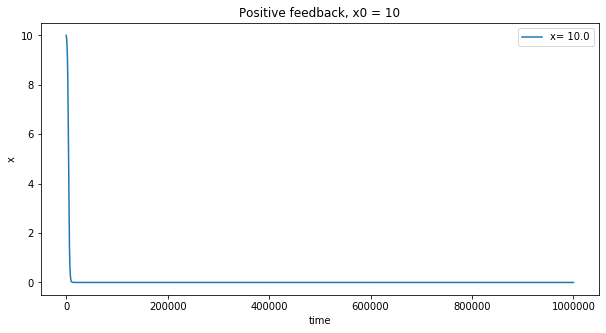

Concentration tends to the value  -0.0


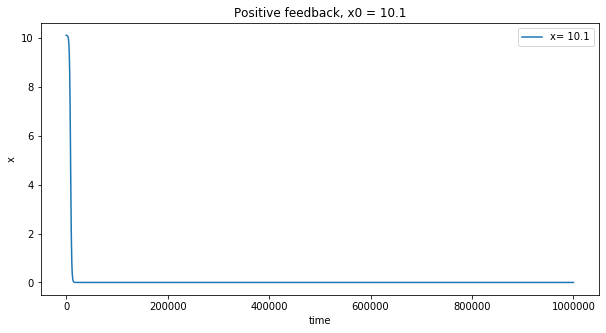

Concentration tends to the value  -0.0

 **Now look what happens**


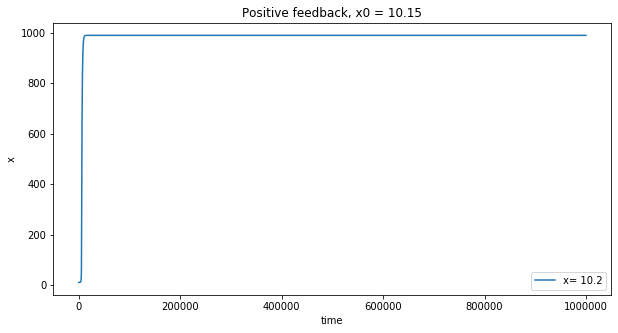

Concentration tends to the value  989.8979


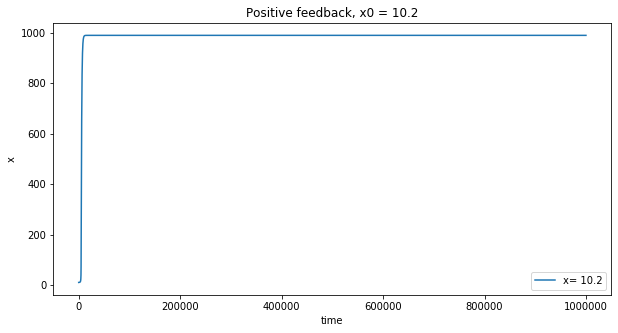

Concentration tends to the value  989.8979


In [21]:
for x in x0:
    y0 = odeint(dx_dt, x, t)
    plt.plot(t, y0)
    
    plt.xlabel('time')
    plt.ylabel('x')
    plt.legend(["x= %.1f" %x])
    if x == 10.15:
        print("\n **Now look what happens**")
    plt.title(f'Positive feedback, x0 = {x}')
    plt.show()
    len_y0=len(y0)
    print("Concentration tends to the value ", round(float(y0[len_y0-1]),4))

The plots show two equilibrium points: one around 0 nM and 989.898 nM approximately. Note that, when the starting concentration is larger than the second equilibrium point, it will decrease, and if it is smaller (but larger that 10 aprox.) it will increase, which it is expected from an attractor point.

The threshold value lies between 10 and 11 approximately, as showed above. We can try to zoom in a little bit more in that interval:


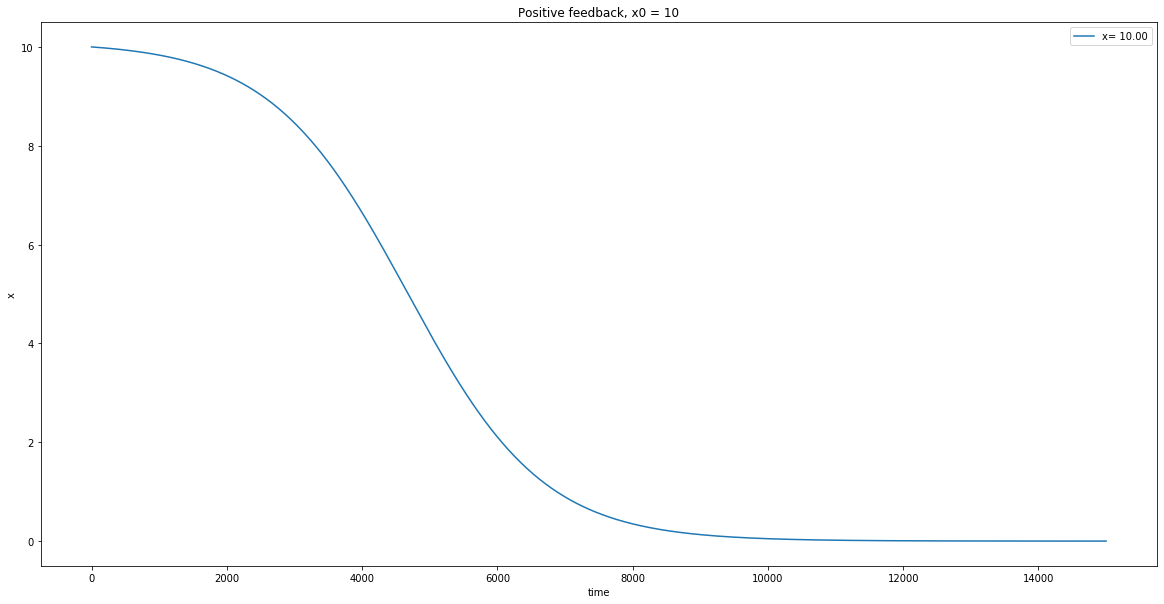

The function tends to the value:  0.0003


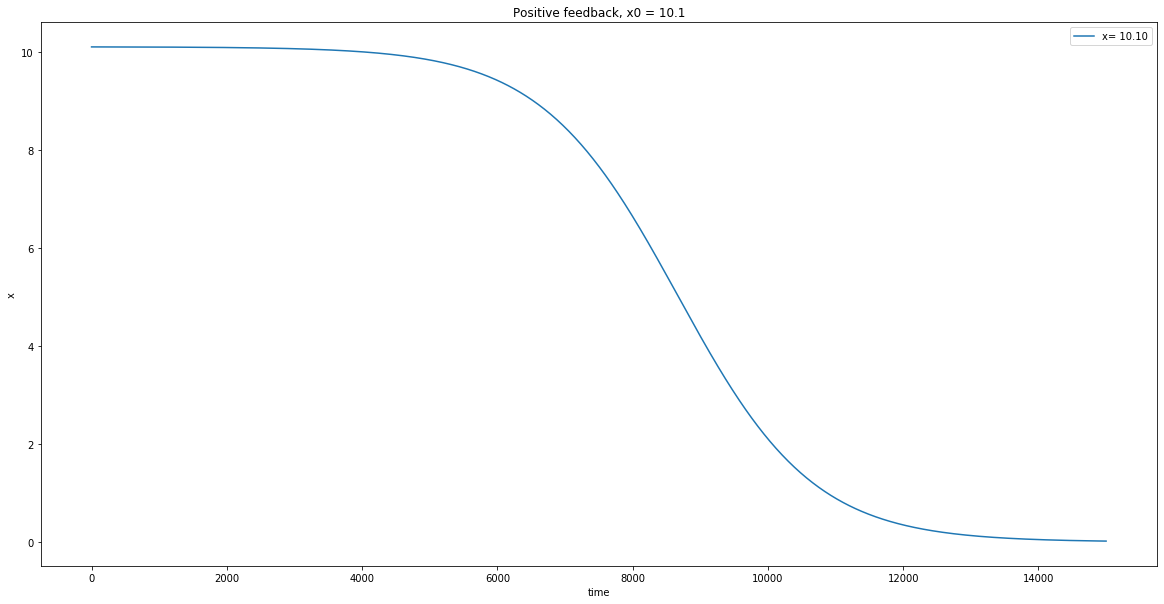

The function tends to the value:  0.0179

 **Now look what happens**


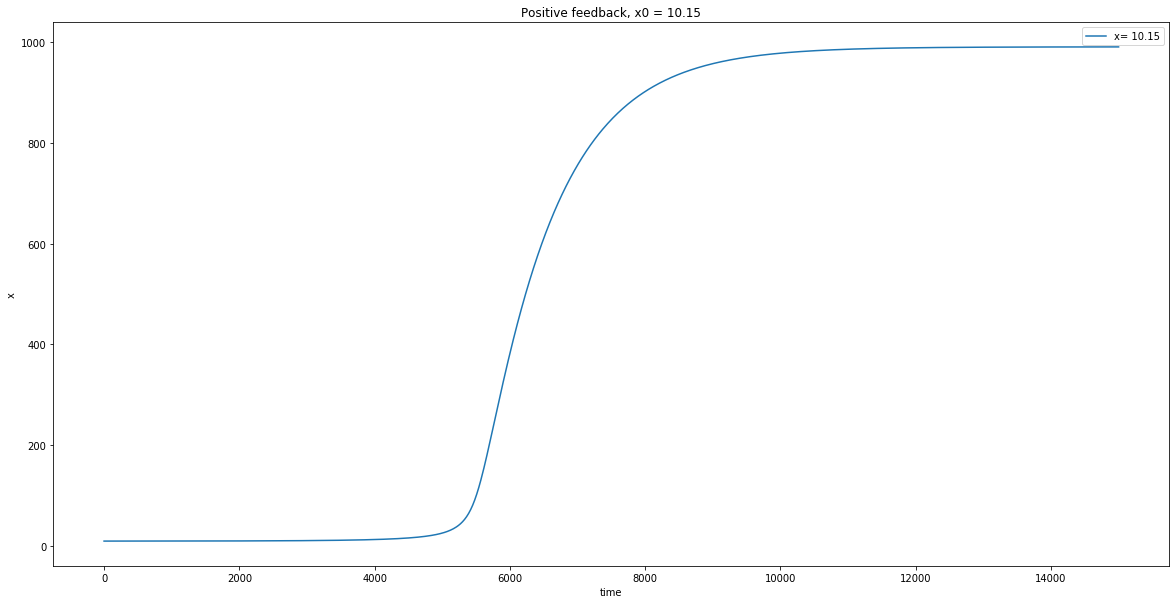

The function tends to the value:  989.8047


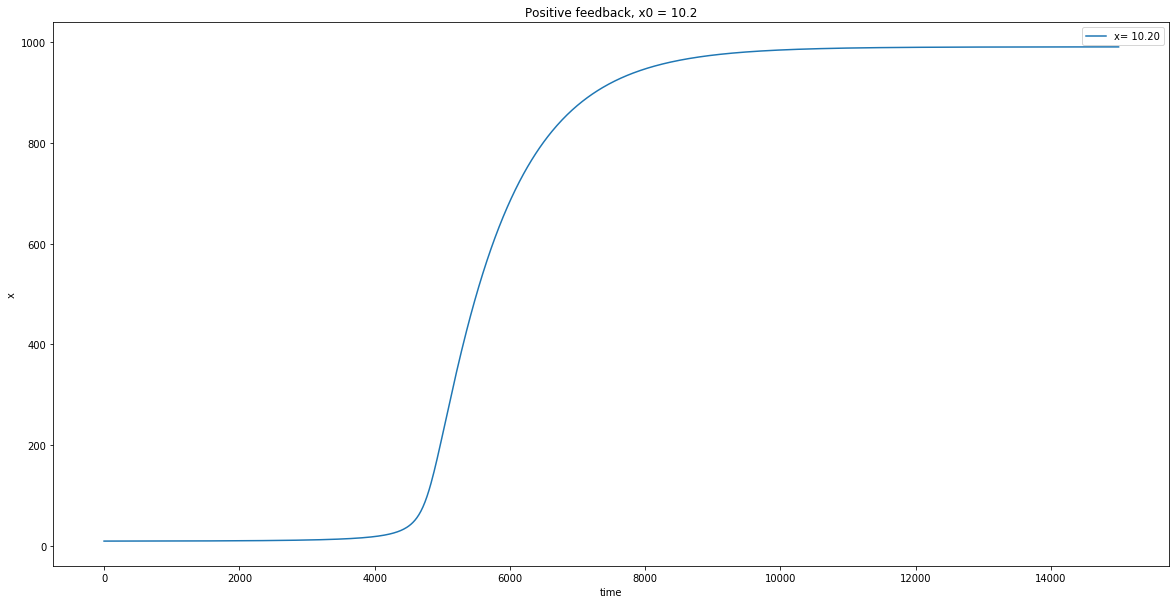

The function tends to the value:  989.8521


In [6]:
x0=[10, 10.1, 10.15, 10.2,]
for x in x0:
    y0 = odeint(dx_dt, x, t)
    plt.plot(t, y0)
    plt.xlabel('time')
    plt.ylabel('x')
    plt.legend(["x= %.2f" %x])
    if x == 10.15:
        print("\n **Now look what happens**")
    plt.title(f'Positive feedback, x0 = {x}')
    plt.show()
    len_y0=len(y0)
    print("The function tends to the value: ", round(float(y0[len_y0-1]),4))

The threshold lies between 10.1 and 10.2.

### Exercise 2 <a class="anchor" id="Exercise-2"></a>
**Consider the following activator-repressor model discussed in class (slide titled “From oscillations to pulses”):**
<img src="img/ex2.png"/>

**Simulate this model for the following parameter values: a2=0.025 nM/s, b1=15 nM/s, b2=0.8 nM/s, d1=d2=5·10-5 s-1, g=2.5·10-7 nM-1s-1, K1=3000 nM, K2=750 nM, and n=m=2. Vary a1 as shown in the slides. Reproduce the dynamics obtained there.**


The setup is similar as before, but more complex:

In [7]:
a2 = 0.025
b1 = 15
b2 = 0.8
d1 = d2 = 5*10**(-5)
g = 2.5*10**(-7)
K1 = 3000
K2 = 750
n = m = 2
y = 0.001
x = 3

# Note that now we need to return dx/dt and dy/dt
def dx_dy(y, t,a1):
    """
    Activator-repressor model from class. Ex2
    """
    x, y = y[0], y[1]
    
    dxdt = (a1+((b1*x**n)/(K1**n + x**n)))-g*x*y-d1*x
    dydt = (a2+((b2*x**m)/(K2**m + x**m)))-d2*y

    return [dxdt, dydt]

Set the initial state (y0 and time stamps).

In [8]:
y0 = [1, 2]
t = np.linspace(0, 1000000,1000)

And plot

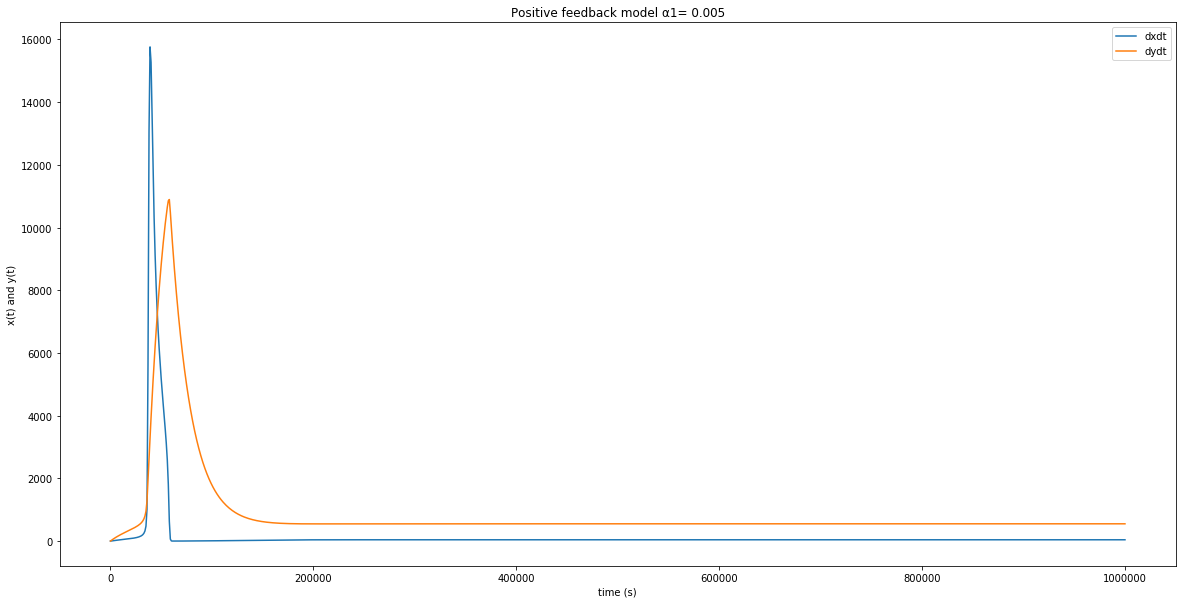

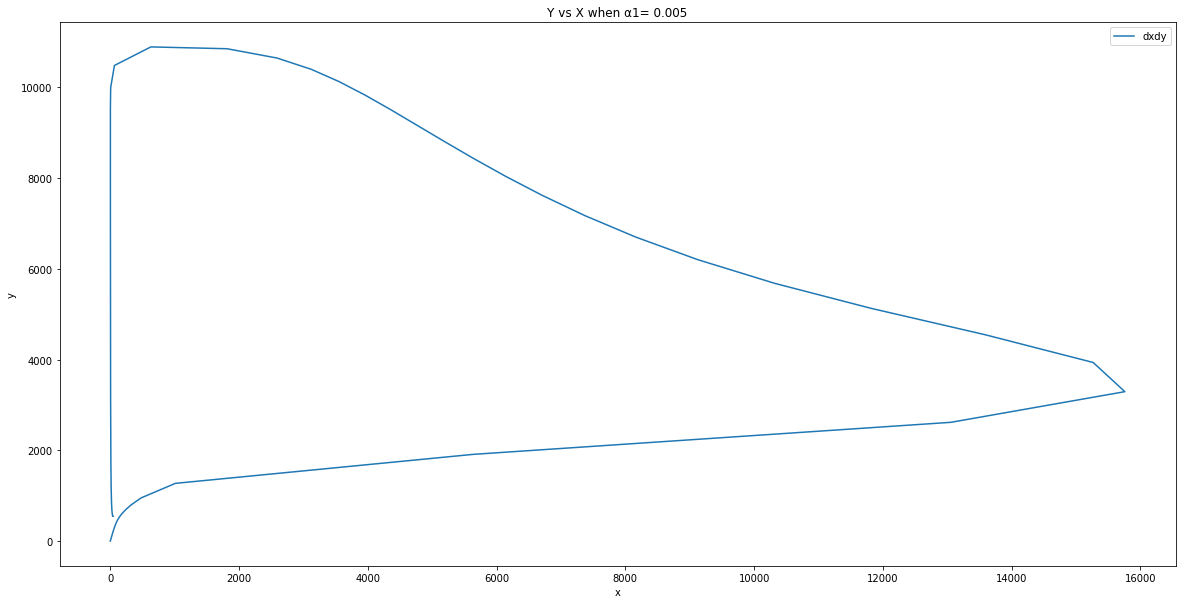

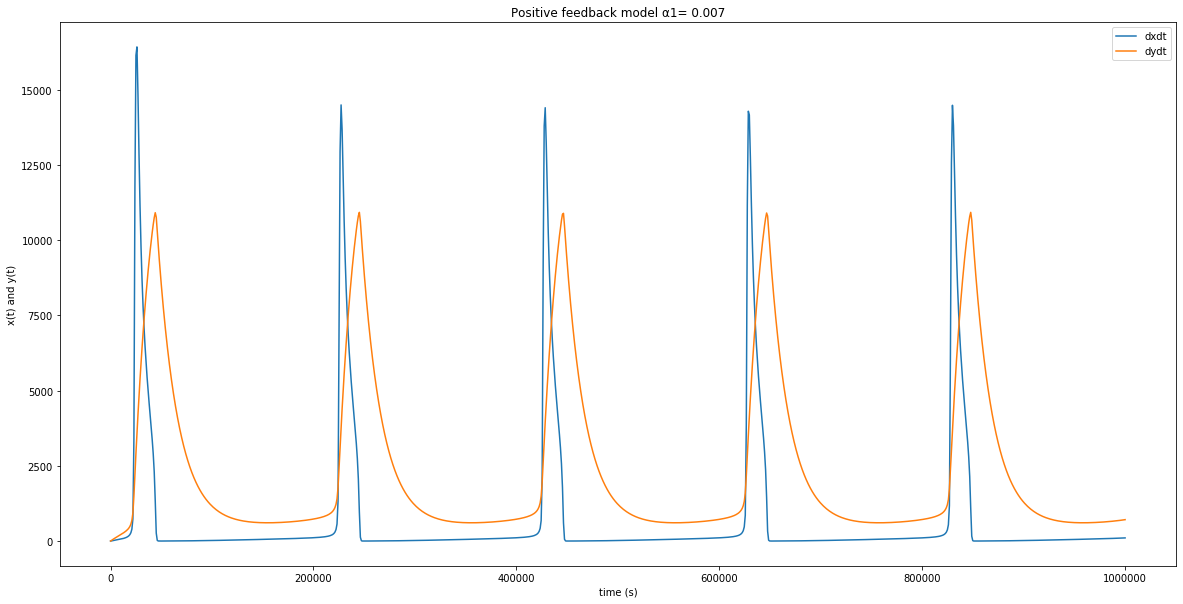

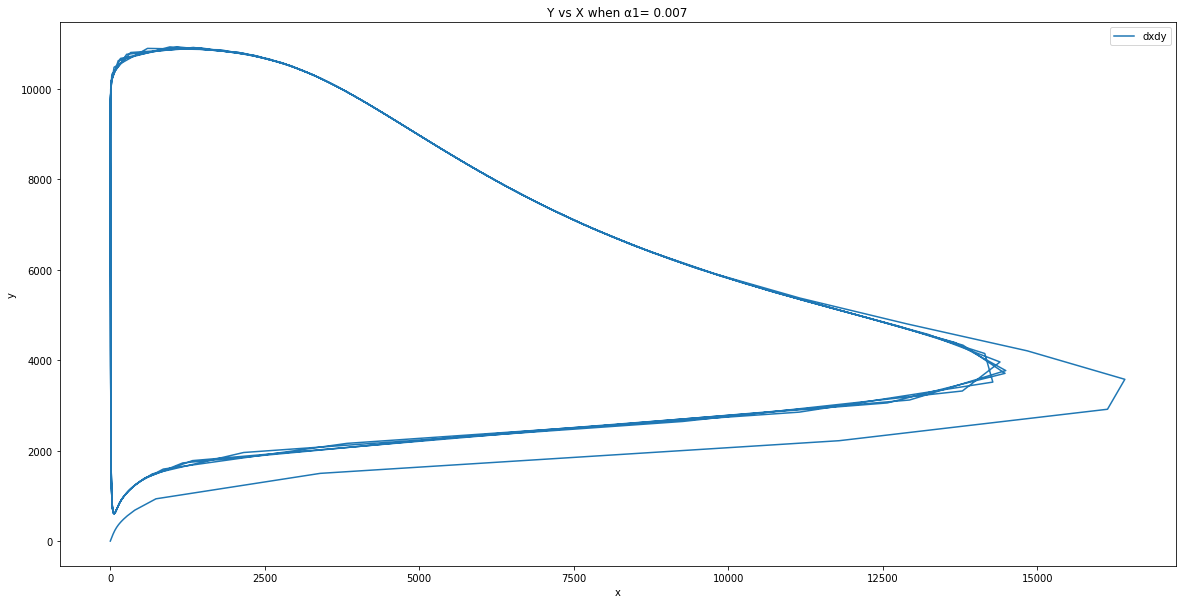

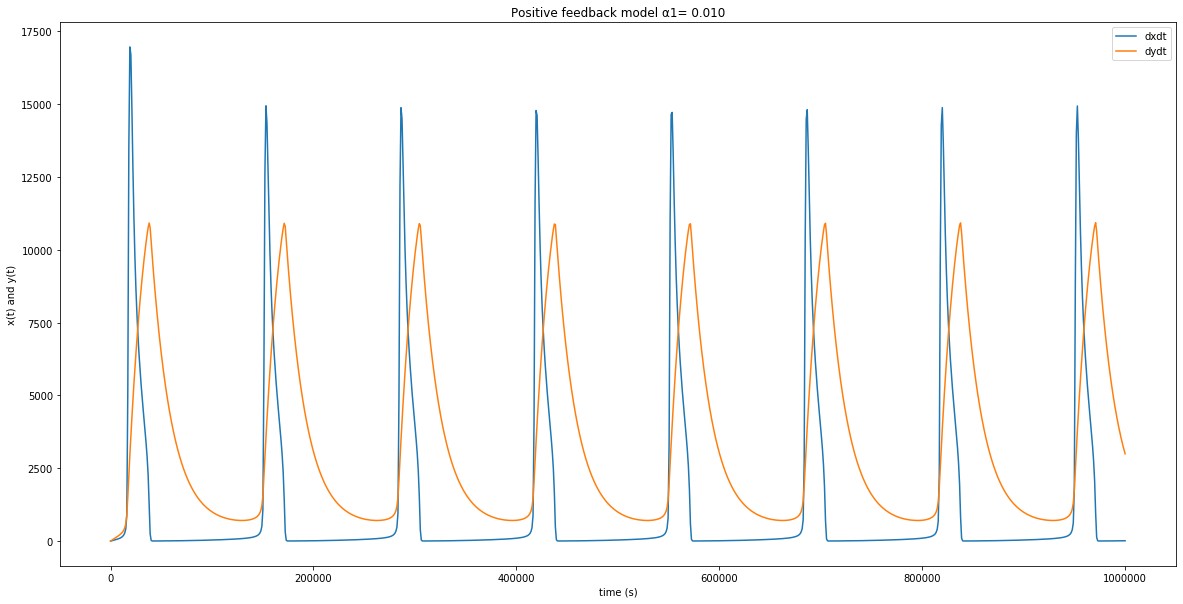

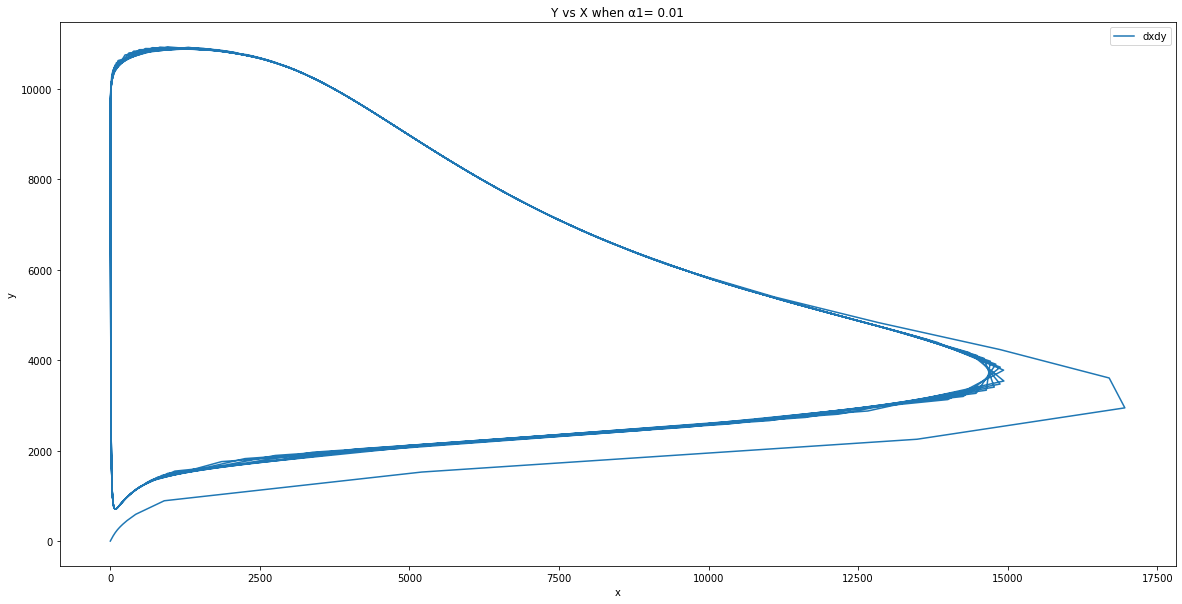

In [9]:
# Values from the slide #6 of the third pdf.
a1=[0.005,0.007,0.01]

for a in a1:
    
    y1 = odeint(dx_dy, y0, t, args=(a,))  
    dx= y1[:,0]
    dyy=y1[:,1]
    plt.plot(t, dx)
    plt.plot(t, dyy)
    plt.xlabel('time (s)')
    plt.ylabel('x(t) and y(t)')
    plt.legend(["dxdt","dydt"])
    plt.title('Positive feedback model α1= %.3f'%a)
    plt.show()
    plt.plot(dx,dyy)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(["dxdy"])
    plt.title(f'Y vs X when α1= {a}')
    plt.show()


See how when a1 is 0.005, the syste does not oscillate, the phase diagram starts and ends in one single turn, but it begins to oscillate with the next two values of a1, see how the line in the phase plots is passing through the same circular path over and over. The plots with time in the x axis look consistent with this. 


### Exercise 3.  <a class="anchor" id="Exercise-3"></a>
**The following model describes genetic competence in B. subtilis:**

<img src="img/ex3.png"/>


**Simulate this model for the parameter values given in the table below:**

<img src="img/ex3_2.png"/>


In [10]:
a_k = 0.0875
a_s = 0.0004
bk = 7.5
bs = 0.06
dk = ds = 1*10**(-4)
kk = 5000
ks = 833
yk = ys = 0.001
Tk = 25000
Ts = 20
n = 2
p = 5


def dK_dS(y, t, a_k, a_s, bs):
    """
    Genetic competence of B Subtilis. Ex3
    """
    K, S = y[0], y[1]
    
    dKdt = (a_k+((bk*(K**n))/(kk**n + K**n)))-((yk*K)/(1+(K/Tk)+(S/Ts)))-(dk*K)
    dSdt = (a_s+(bs/(1 + ((K/ks)**p)))-((ys*S)/(1+(K/Tk)+(S/Ts)))-(ds*S))

    return [dKdt, dSdt]

Setting up:

In [11]:
y0 = [1, 0.1]
t = np.linspace(0, 1000000,10000)

And now solve it:

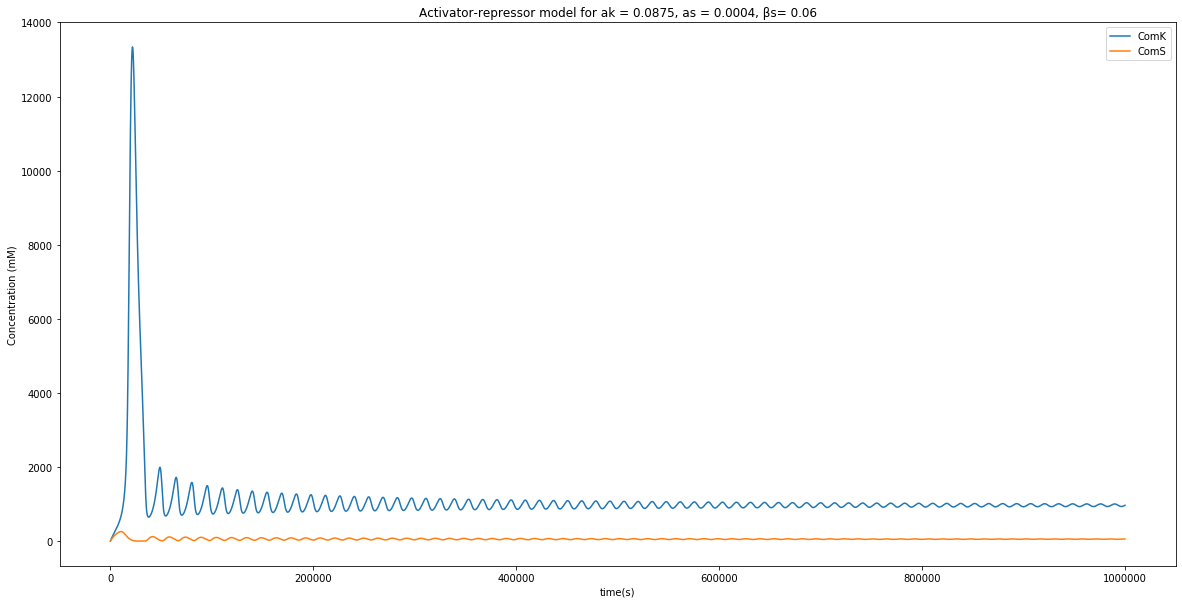

[ComS] tends to the value:  57.738
[ComK] tends to the value:  966.31


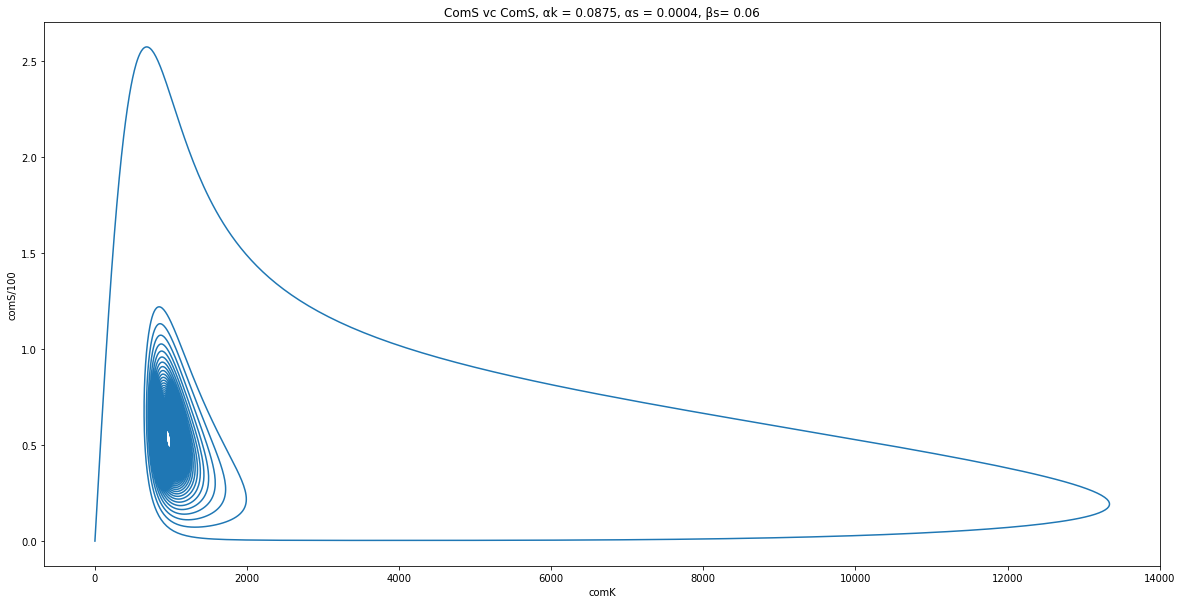

In [12]:
y1 = odeint(dK_dS, y0, t,args=(a_k,a_s,bs))
dK= y1[:,0]
dS=y1[:,1]


plt.plot(t, dK)
plt.plot(t, dS)
plt.xlabel('time(s)')
plt.ylabel('Concentration (mM)')
plt.legend(["ComK","ComS"])
plt.title(f'Activator-repressor model for ak = {a_k}, as = {a_s}, βs= {bs}')
plt.show()
len_yS=len(dS)
len_yK=len(dK)
print("[ComS] tends to the value: ", round(float(dS[len_yS-1]),3))
print("[ComK] tends to the value: ", round(float(dK[len_yK-1]),3))

plt.plot(dK,dS/100)
plt.xlabel('comK')
plt.ylabel('comS/100')
plt.title(f'ComS vc ComS, αk = {a_k}, αs = {a_s}, βs= {bs}')


plt.show()



We can see how, with the given values, the system oscillates, but the concentrations end up converging, it is stuck in genetic competence.

**Next, vary the parameters 𝛼k, 𝛼s and 𝛽s (one at a time) and study the response of the system in the different situations. Reproduce the different dynamical regimes studied in class.**


#### Changing ComK basal expression. <a class="anchor" id="change-ak"></a> 

#### When ak= 0.000875, 0.0875, 0.875, 2 and 5

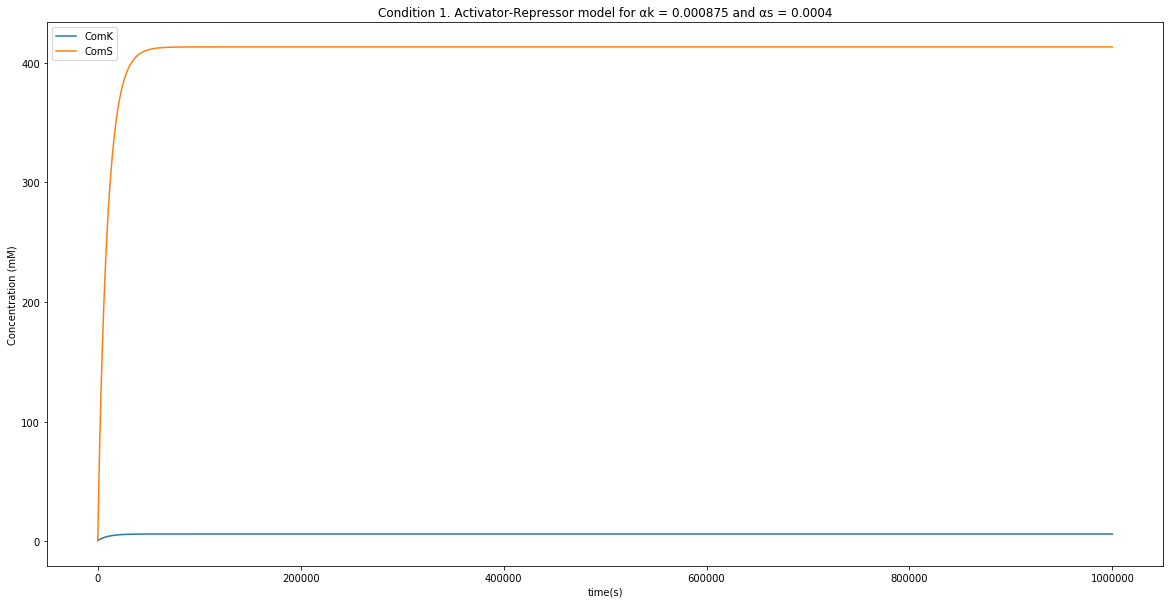

When αk = 0.0009
[ComS] tends to the value:  413.235
[ComK] tends to the value:  6.062


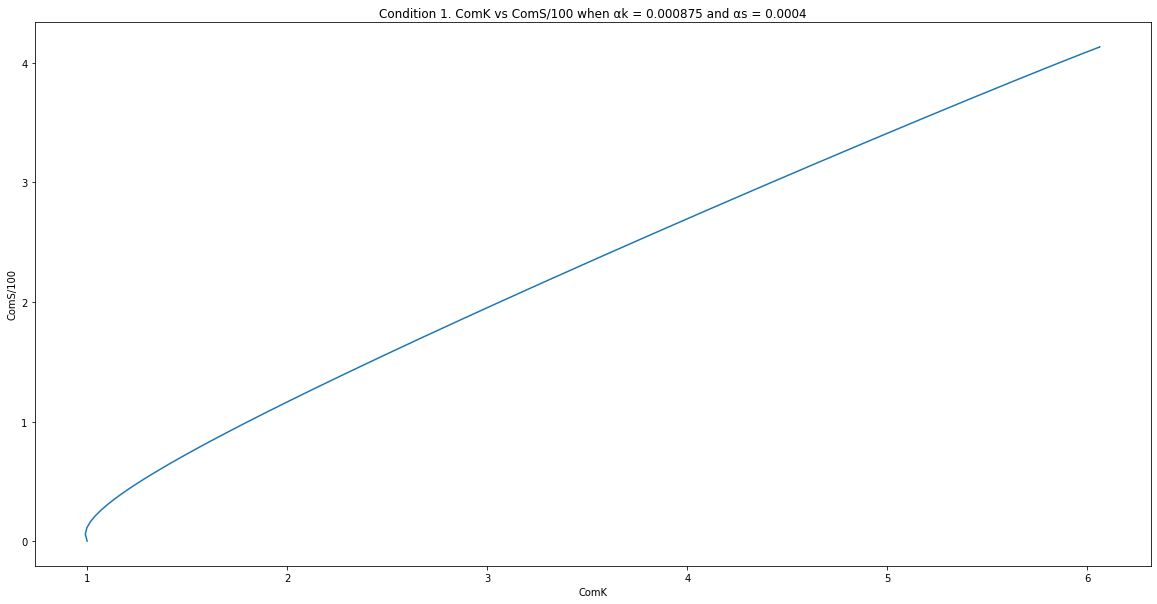

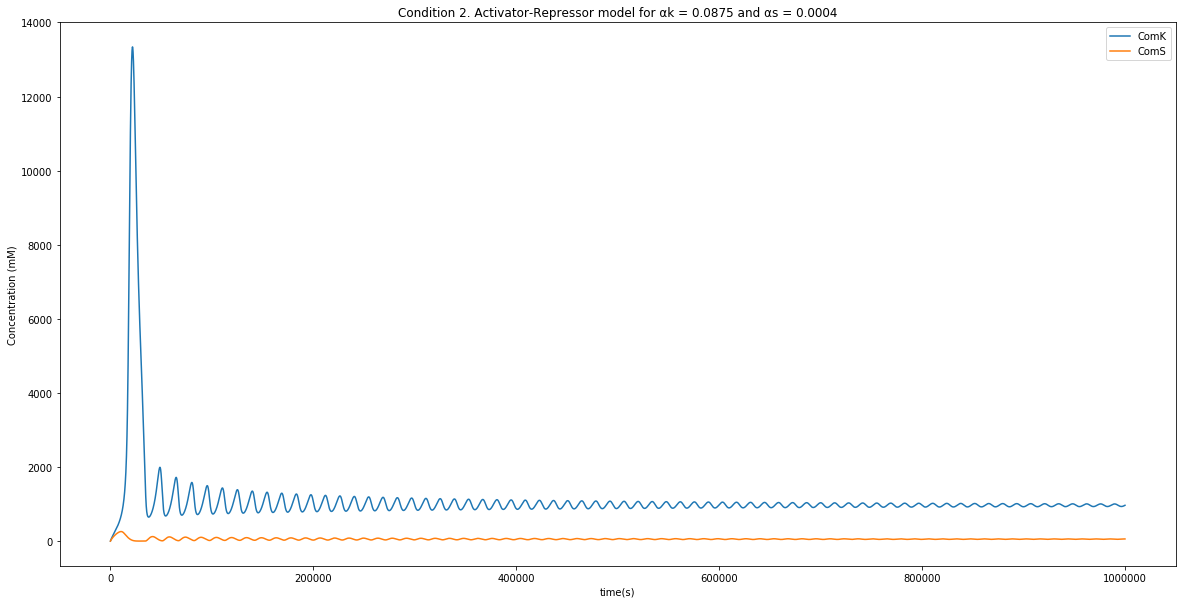

When αk = 0.0875
[ComS] tends to the value:  57.738
[ComK] tends to the value:  966.31


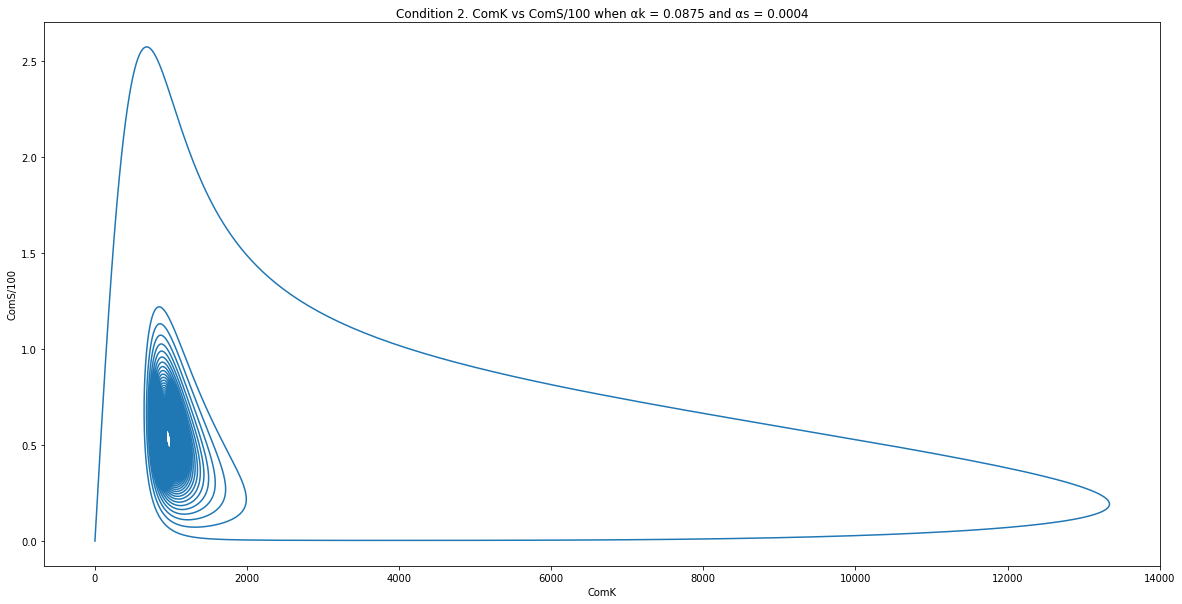

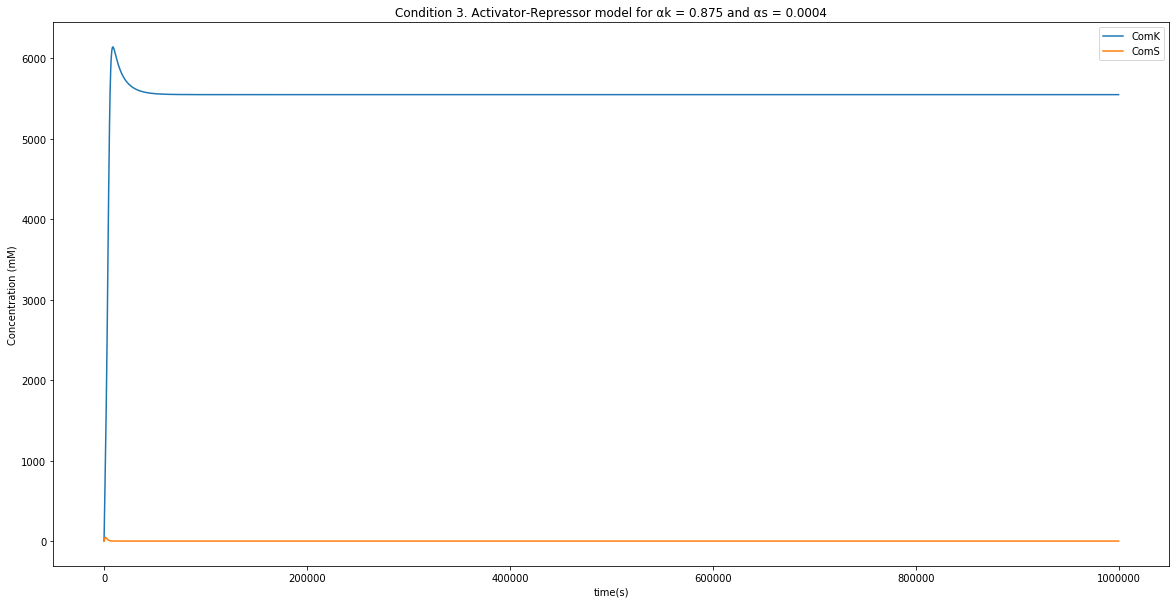

When αk = 0.8750
[ComS] tends to the value:  0.448
[ComK] tends to the value:  5548.956


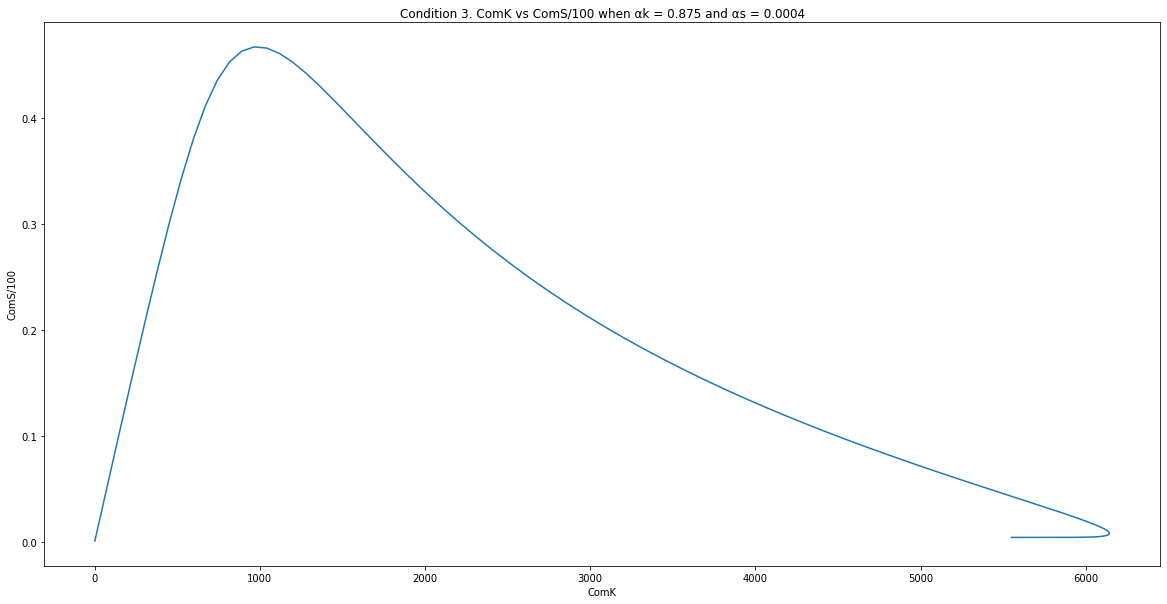

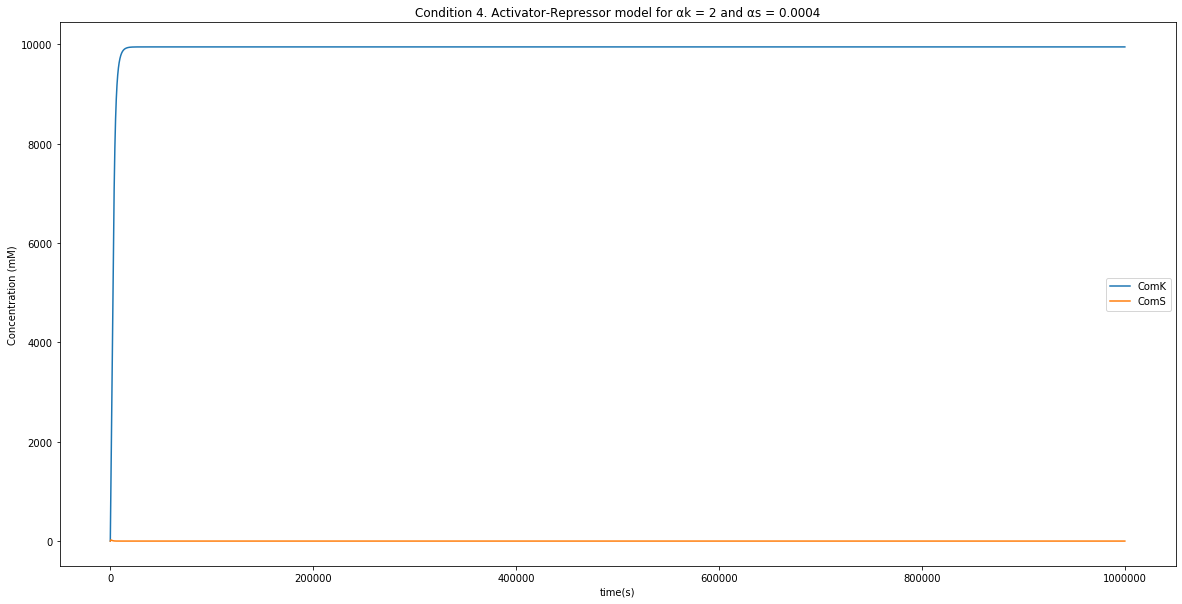

When αk = 2.0000
[ComS] tends to the value:  0.499
[ComK] tends to the value:  9950.873


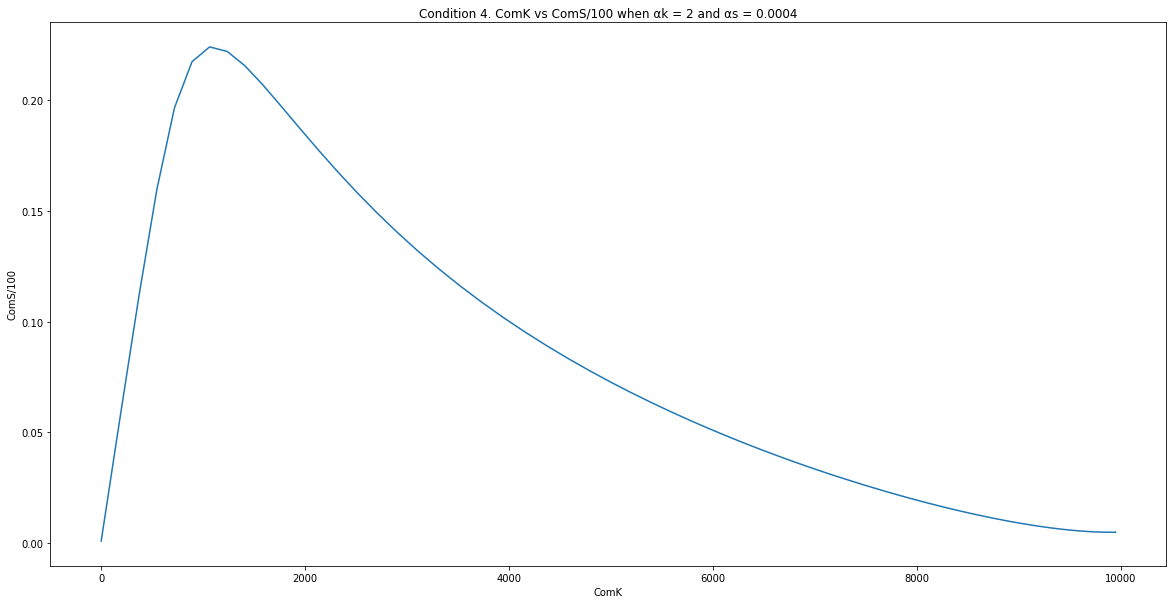

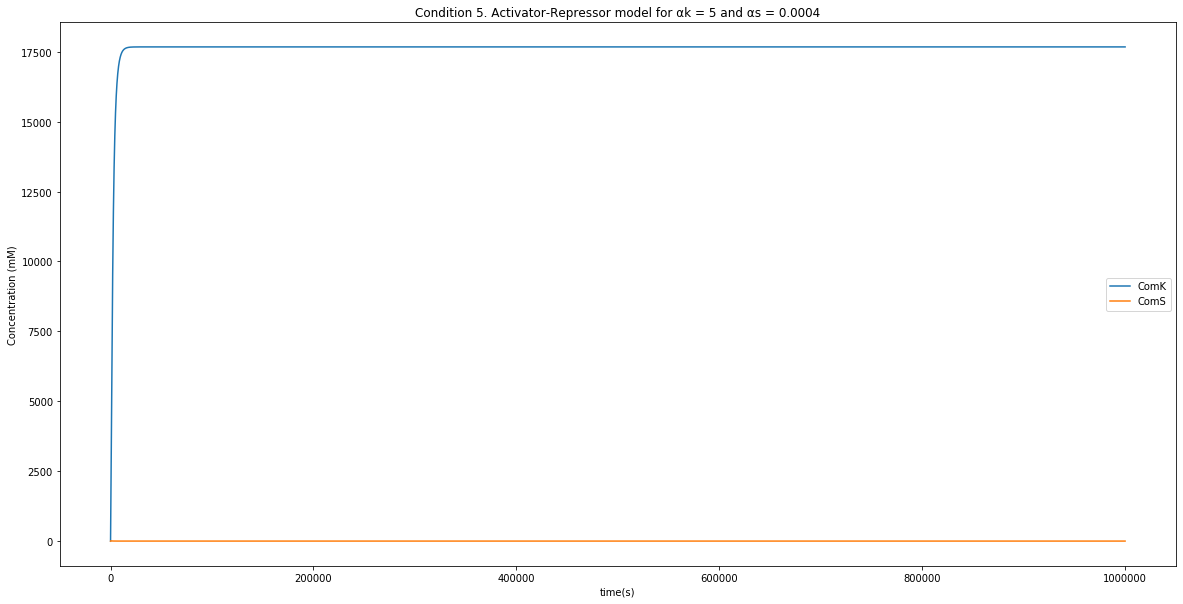

When αk = 5.0000
[ComS] tends to the value:  0.592
[ComK] tends to the value:  17671.89


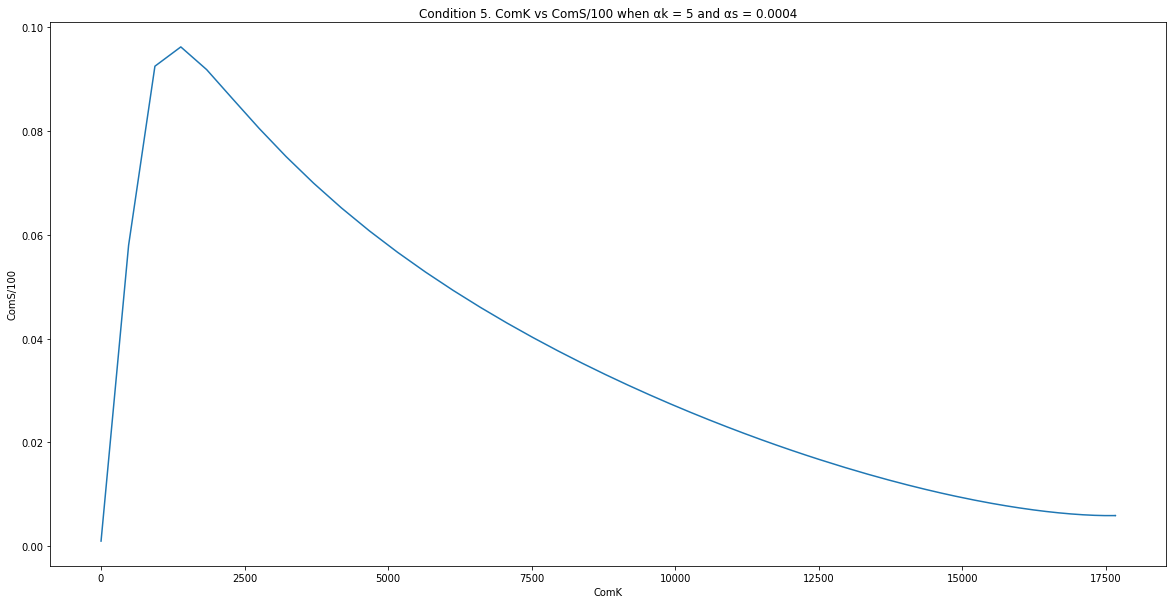

In [13]:
a_k = [0.000875,0.0875,0.875,2,5]
i = 0

for ak in a_k:
    y1 = odeint(dK_dS, y0, t, args=(ak, a_s,bs))
    dK = y1[:, 0]
    dS = y1[:, 1]
    plt.plot(t, dK)
    plt.plot(t, dS)
    plt.xlabel('time(s)')
    plt.ylabel('Concentration (mM)')
    plt.legend(["ComK","ComS"])
    plt.title(f'Condition {i+1}. Activator-Repressor model for αk = {ak} and αs = {a_s}')
    plt.show()
    len_yS=len(dS)
    len_yK=len(dK)
    print("When αk = %.4f" %ak)
    print("[ComS] tends to the value: ", round(float(dS[len_yS-1]),3))
    print("[ComK] tends to the value: ", round(float(dK[len_yK-1]),3))


    plt.plot(dK, dS/100)
    plt.xlabel('ComK')
    plt.ylabel('ComS/100')
    plt.title(f'Condition {i+1}. ComK vs ComS/100 when αk = {ak} and αs = {a_s}')
    plt.show()
    i = i+1

We can clearly see how in the beginning, the stable state is reached with a much more higher concentration of comS with respect to comK. Then, when the basal expression of comK is higher, whe can observe some oscillations that lead to a stabilization of both species, also converging to closer concentrations. If we keep increasing αk, the situation is the opposite of the first one.


### Changing ComS basal expression rate <a class="anchor" id="change-as"></a> 

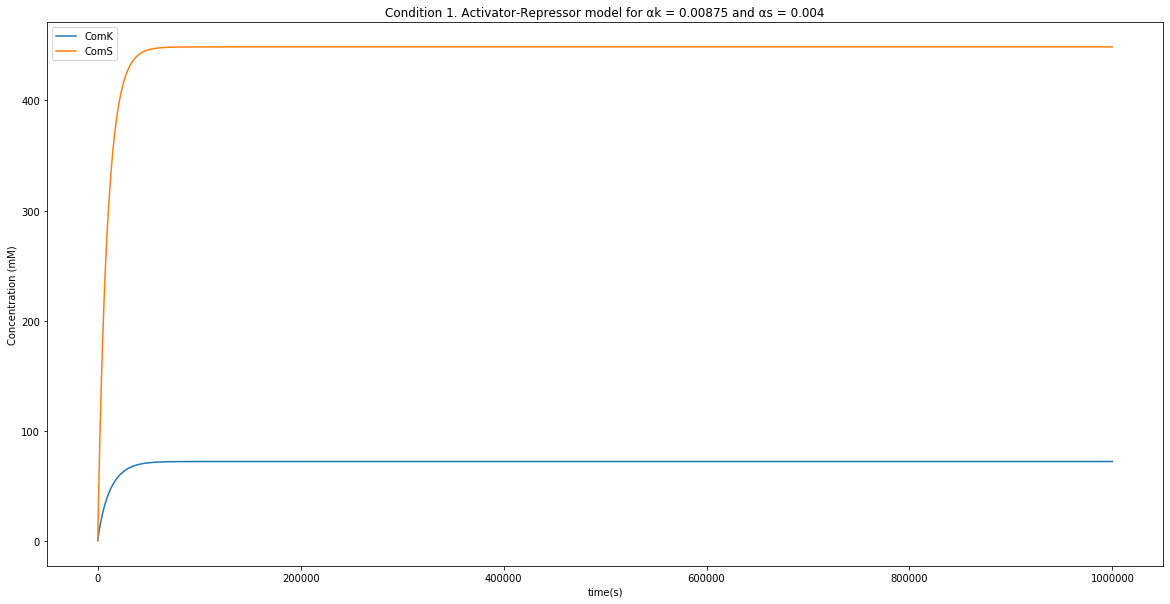

[ComS] tends to the value:  448.558
[ComK] tends to the value:  72.322


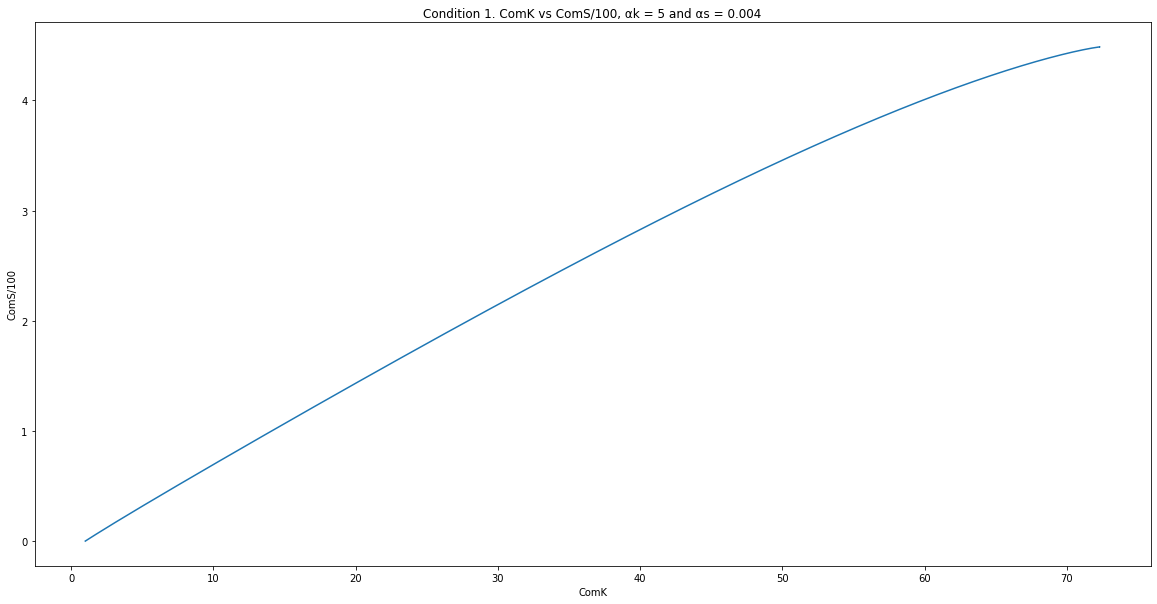

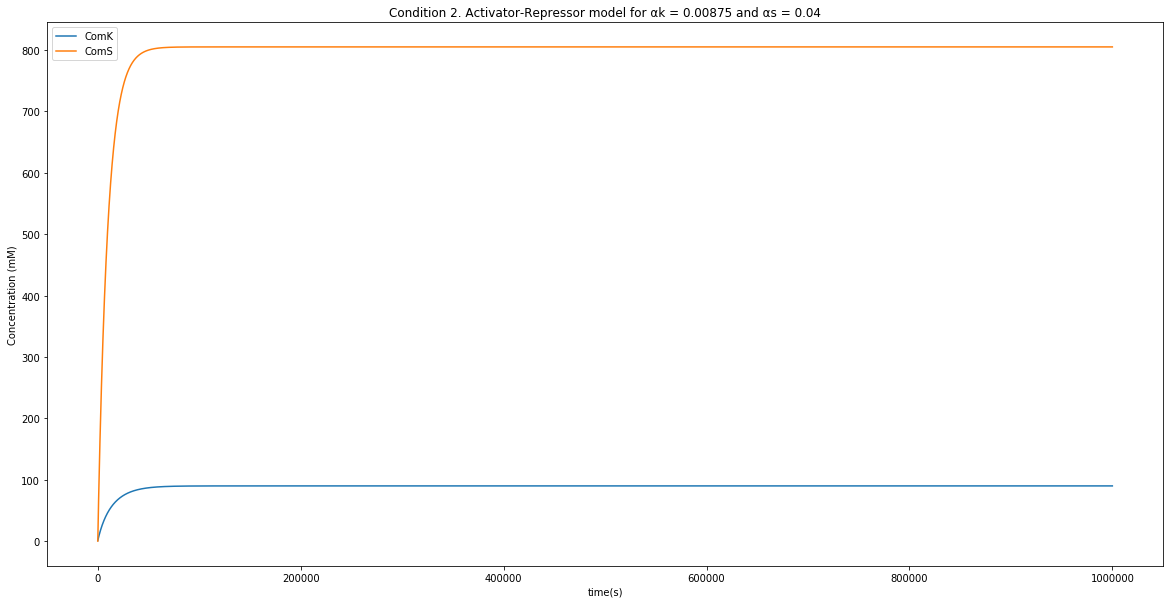

[ComS] tends to the value:  804.858
[ComK] tends to the value:  89.96


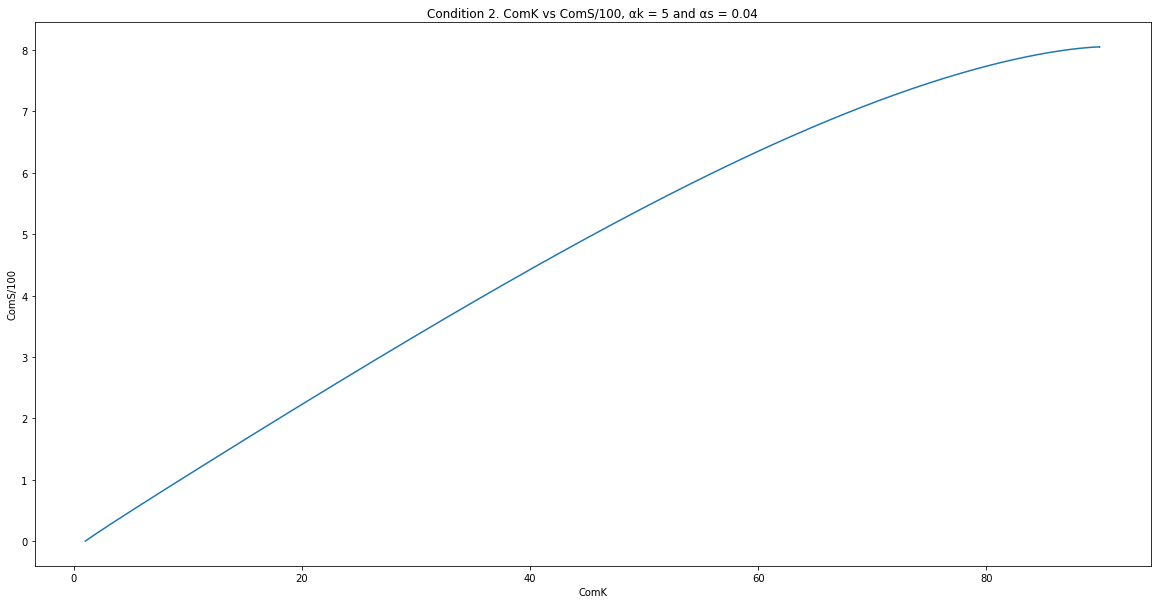

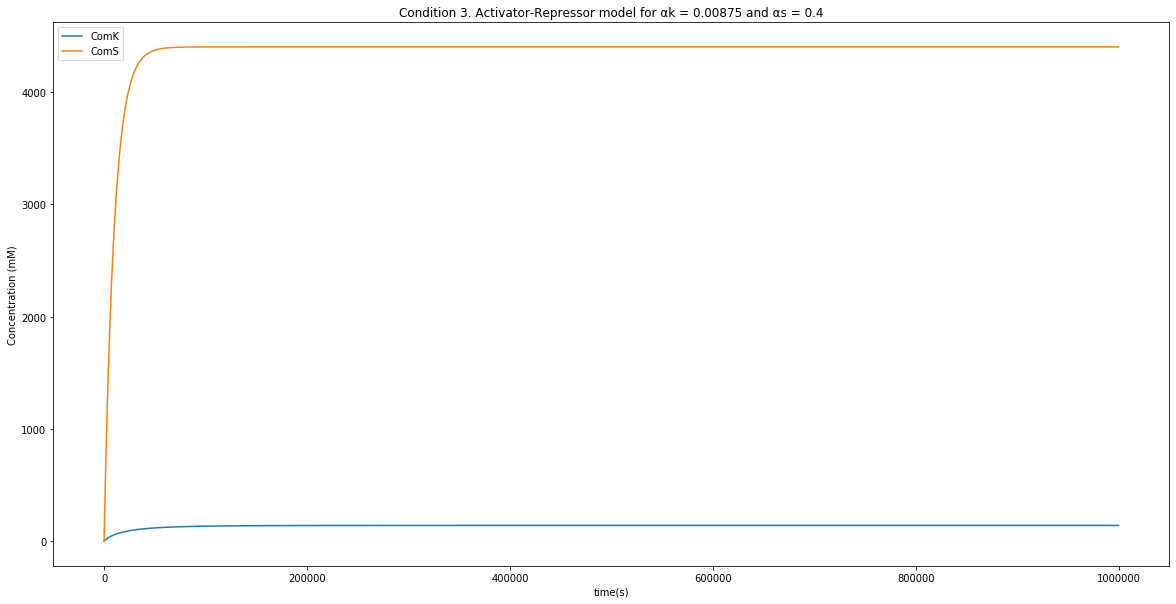

[ComS] tends to the value:  4400.83
[ComK] tends to the value:  139.617


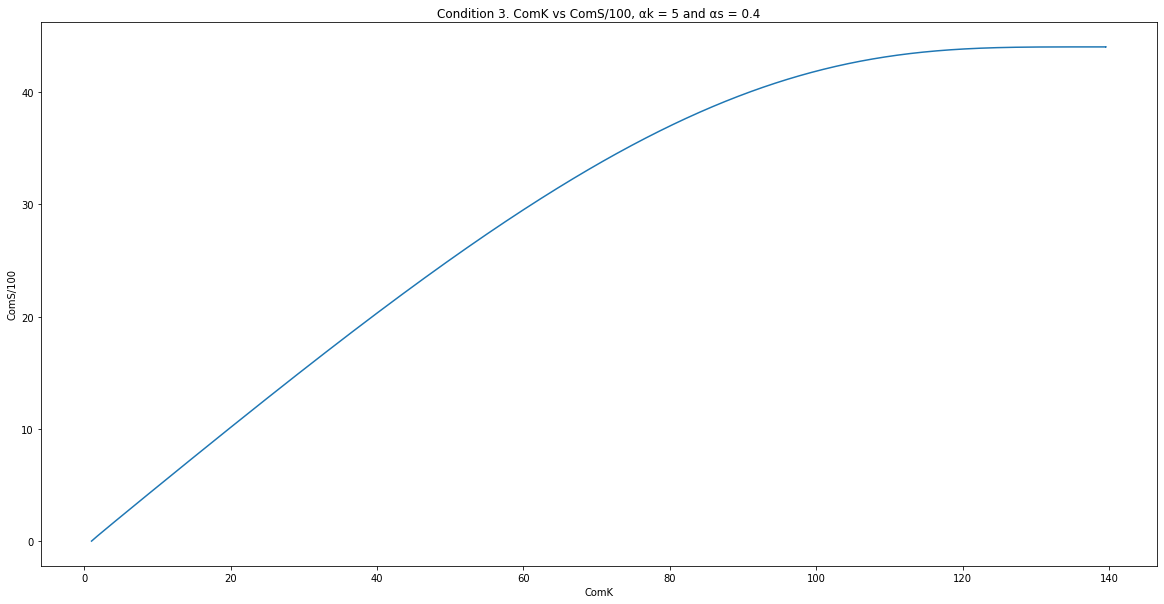

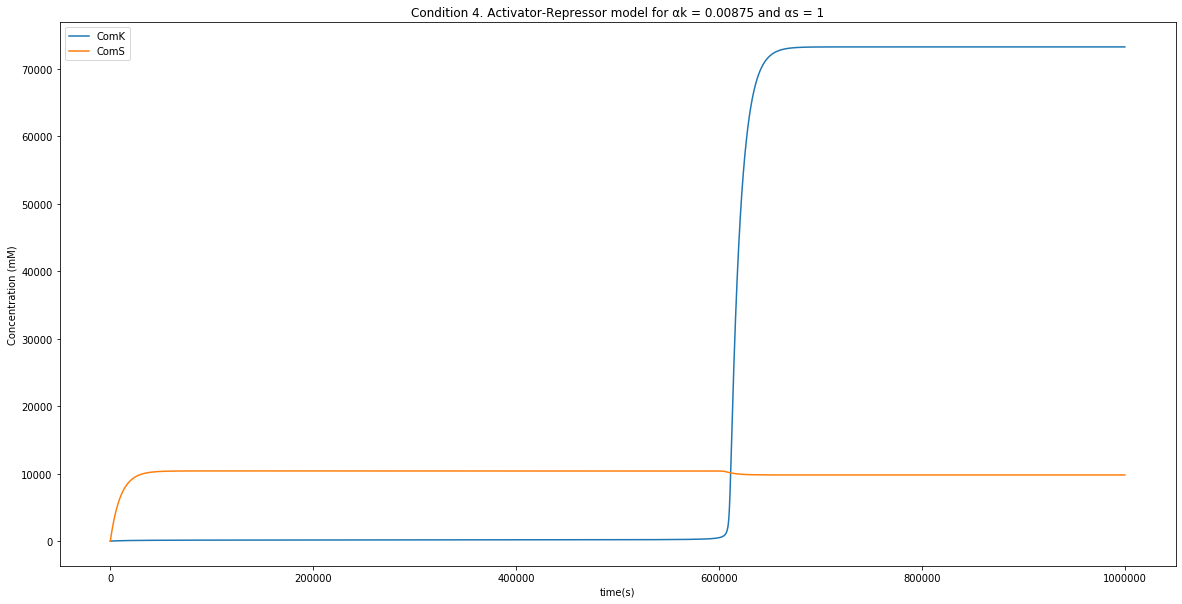

[ComS] tends to the value:  9801.591
[ComK] tends to the value:  73256.832


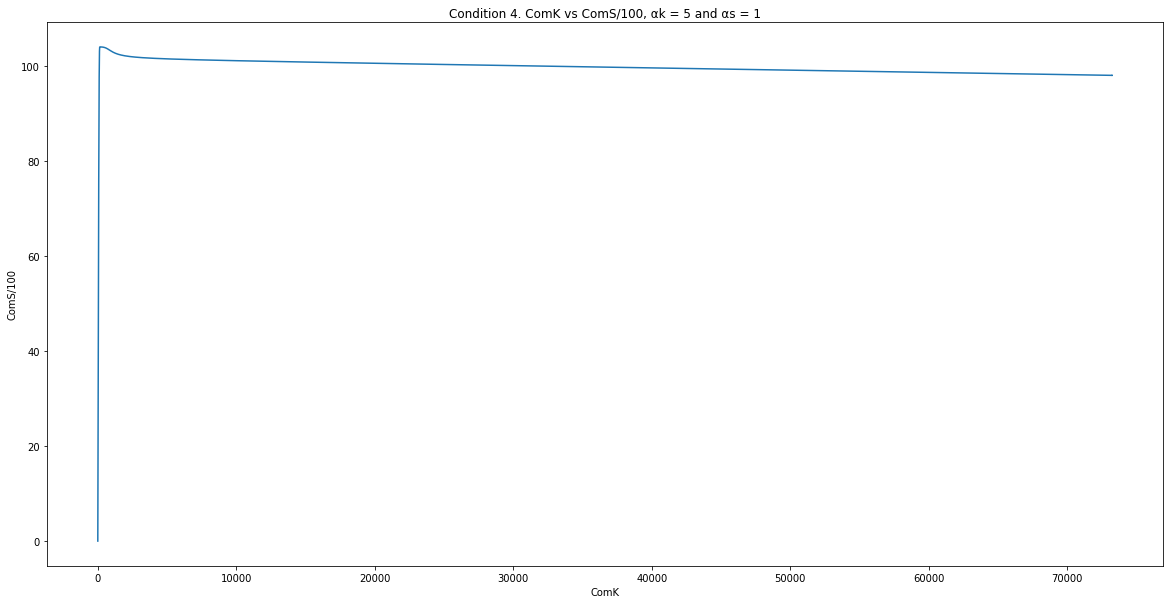

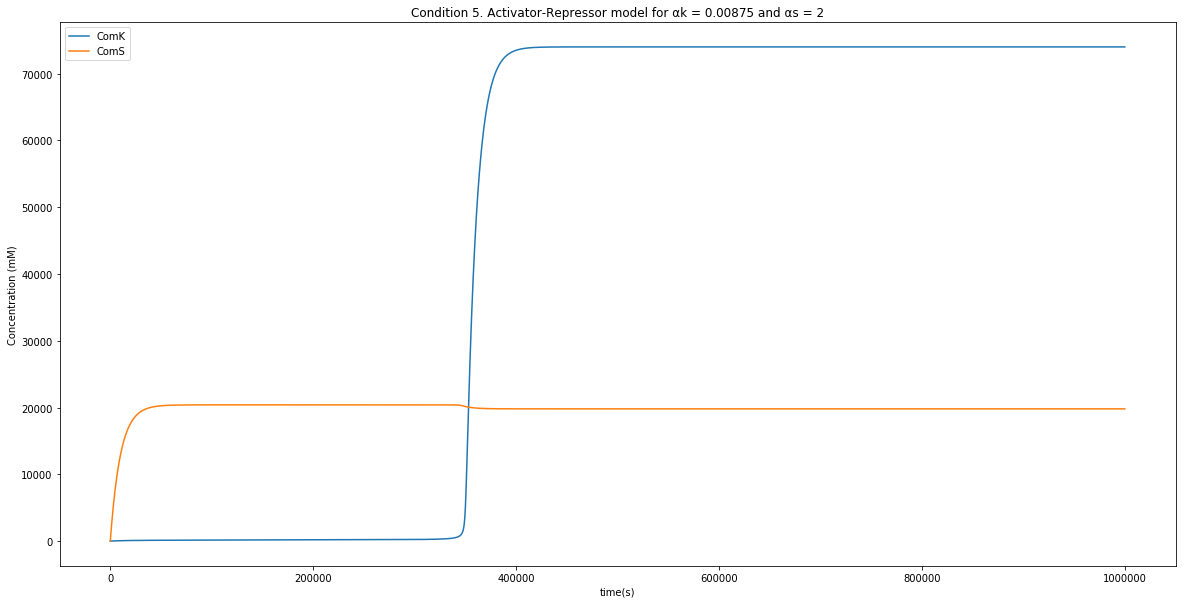

[ComS] tends to the value:  19800.797
[ComK] tends to the value:  74002.184


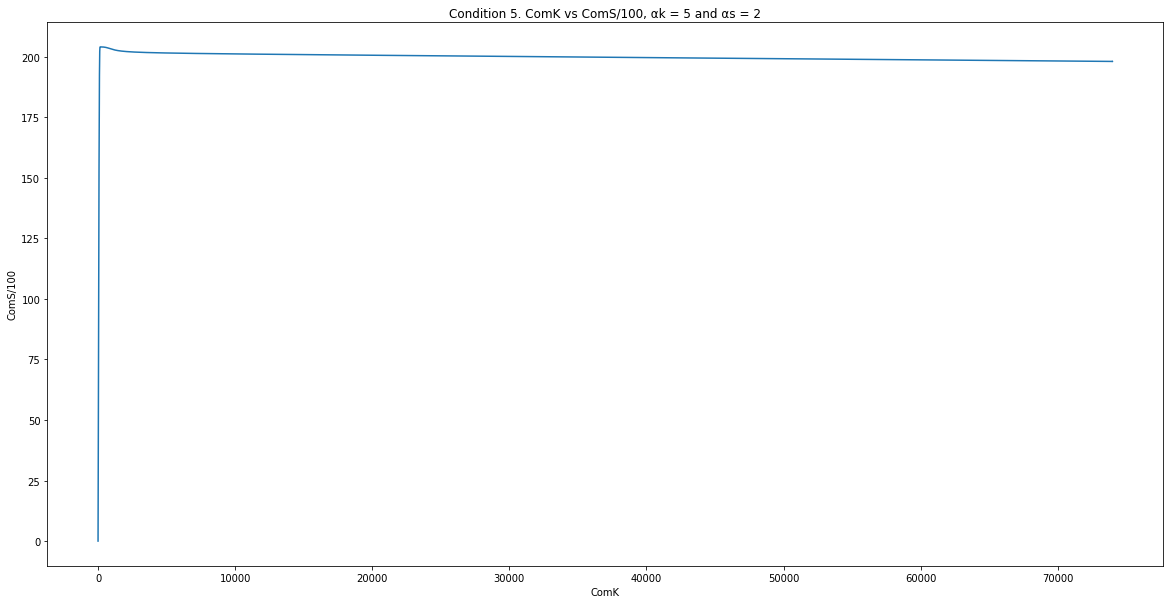

In [14]:
a_s1 = [0.004,0.04,0.4,1,2]
i = 0
    
for a_s in a_s1:
    a_k = 0.00875
    bs = 0.06
    y1 = odeint(dK_dS, y0, t, args=(a_k, a_s, bs))
    dK = y1[:, 0]
    dS = y1[:, 1]
    plt.plot(t, dK)
    plt.plot(t, dS)
    plt.xlabel('time(s)')
    plt.ylabel('Concentration (mM)')
    plt.legend(["ComK","ComS"])
    plt.title(f'Condition {i+1}. Activator-Repressor model for αk = {a_k} and αs = {a_s}')
    plt.show()
    len_yS=len(dS)
    len_yK=len(dK)
    print("[ComS] tends to the value: ", round(float(dS[len_yS-1]),3))
    print("[ComK] tends to the value: ", round(float(dK[len_yK-1]),3))

    plt.plot(dK, dS/100)
    plt.xlabel('ComK')
    plt.ylabel('ComS/100')
    plt.title(f'Condition {i+1}. ComK vs ComS/100, αk = {ak} and αs = {a_s}')
    plt.show()
    i = i + 1
    

Starting with a lower αs, we can see how as soon as this parameter is risen, the concentration of ComS increases significantly (from condition 1 to 2). This continues that way until Condition 4, where this tendence is reversed passed some time, with an abrupt change. ComK concentration rises dramatically while com S stays almost the same, decreasing a little bit. This could be the bistable state reached at high values of αs, where one equilibrium point lies at higher comS concentrations, and the other at high comK concentrations.

#### Changing ComS unrepressed expression rateunrepressed expression <a class="anchor" id="change-bs"></a> 

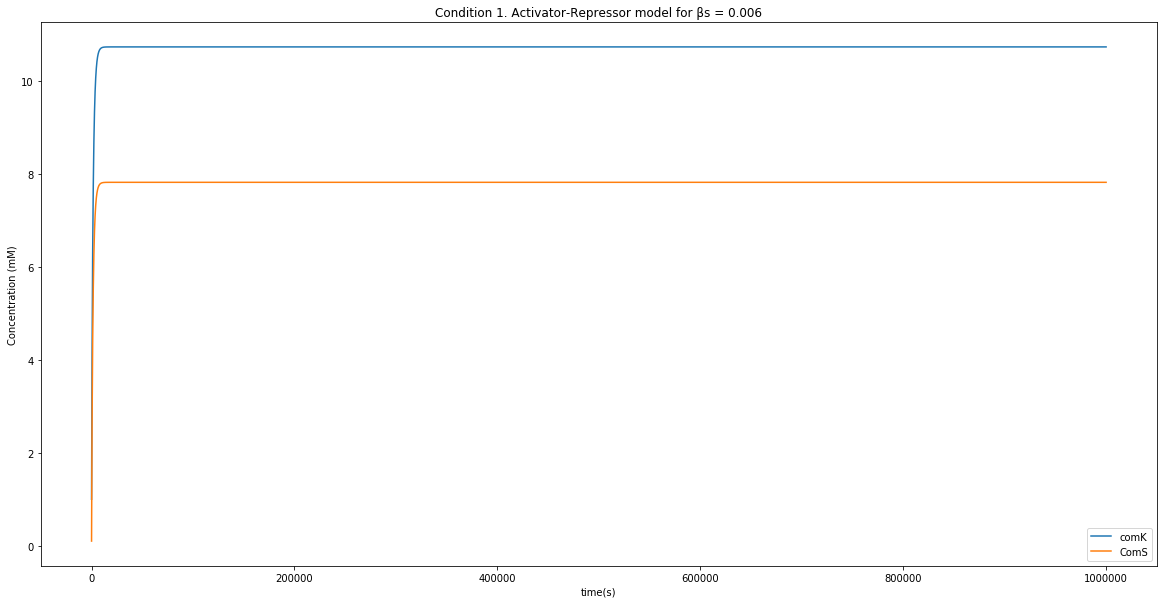

When βs = 0.0060
[ComS] tends to the value:  7.817
[ComK] tends to the value:  10.729


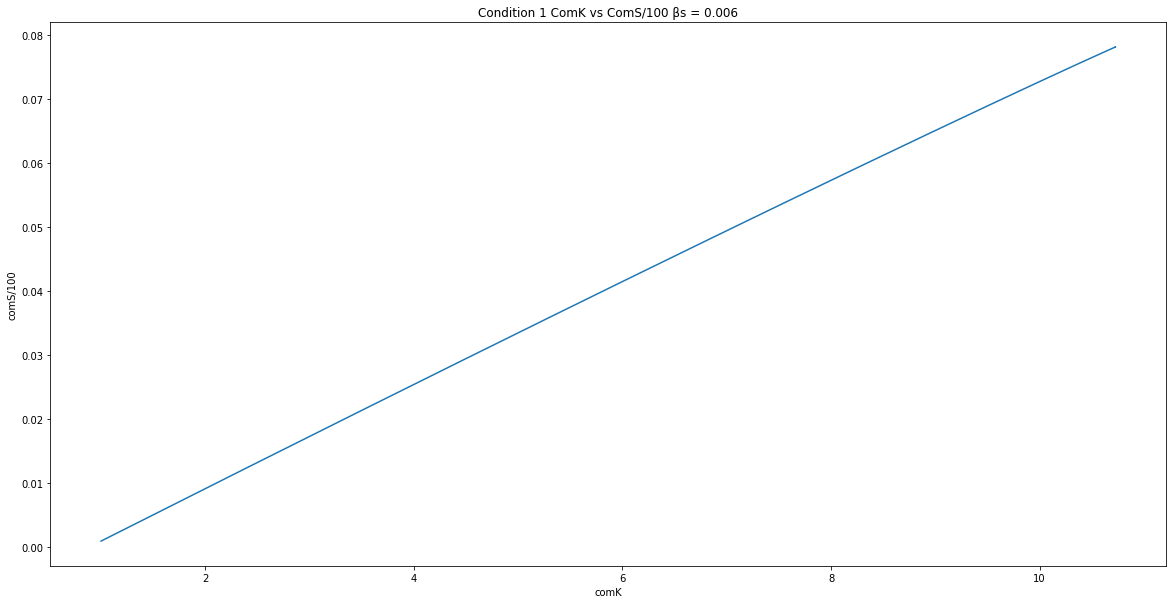

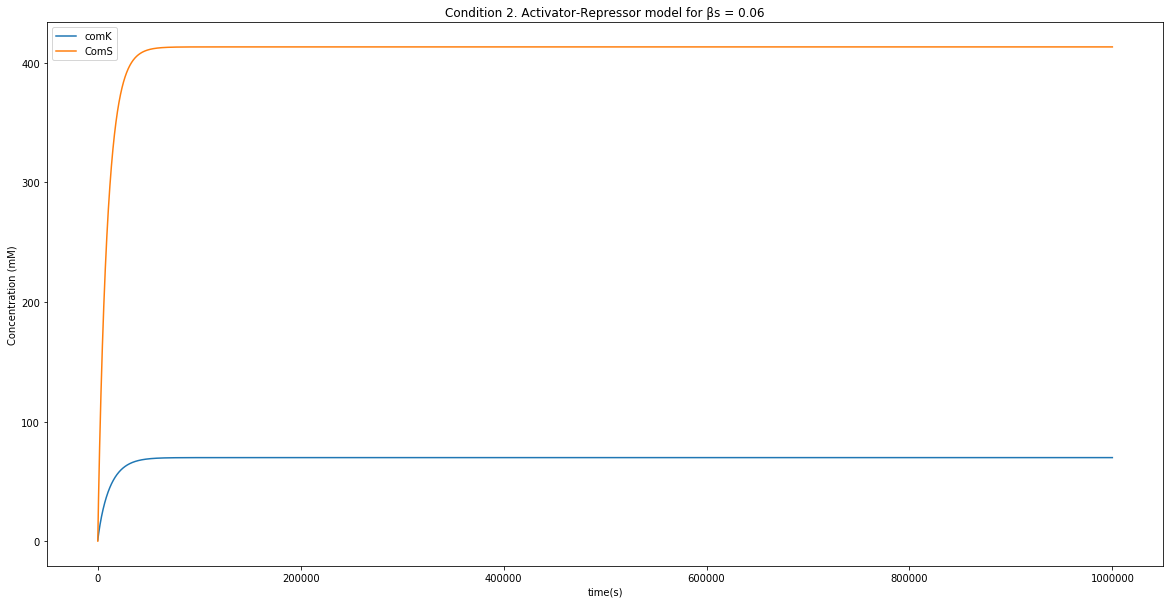

When βs = 0.0600
[ComS] tends to the value:  413.255
[ComK] tends to the value:  69.892


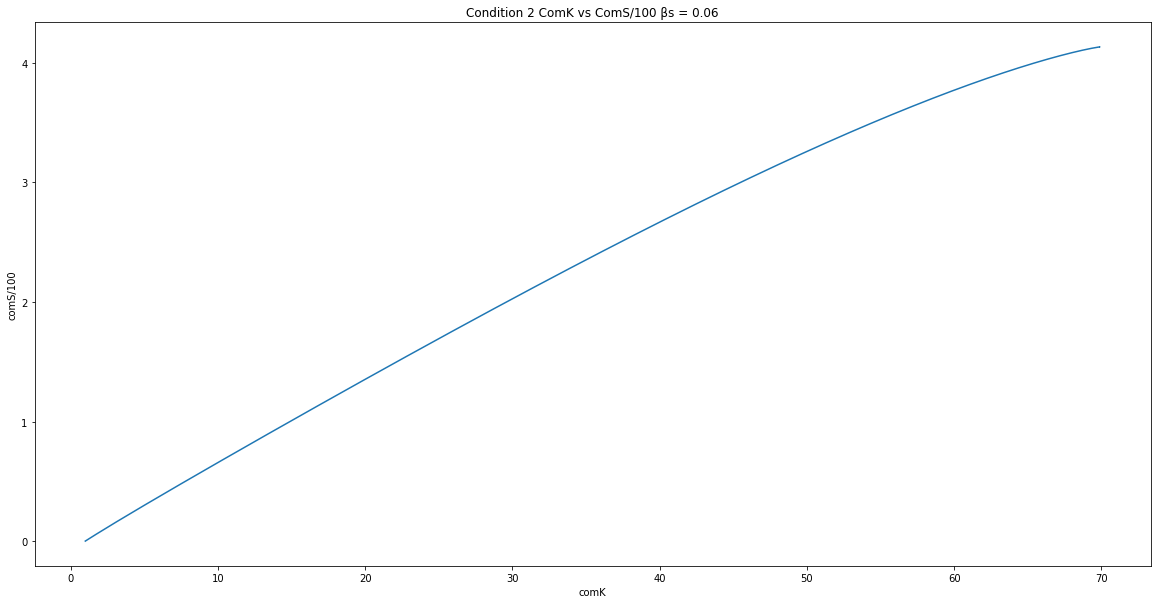

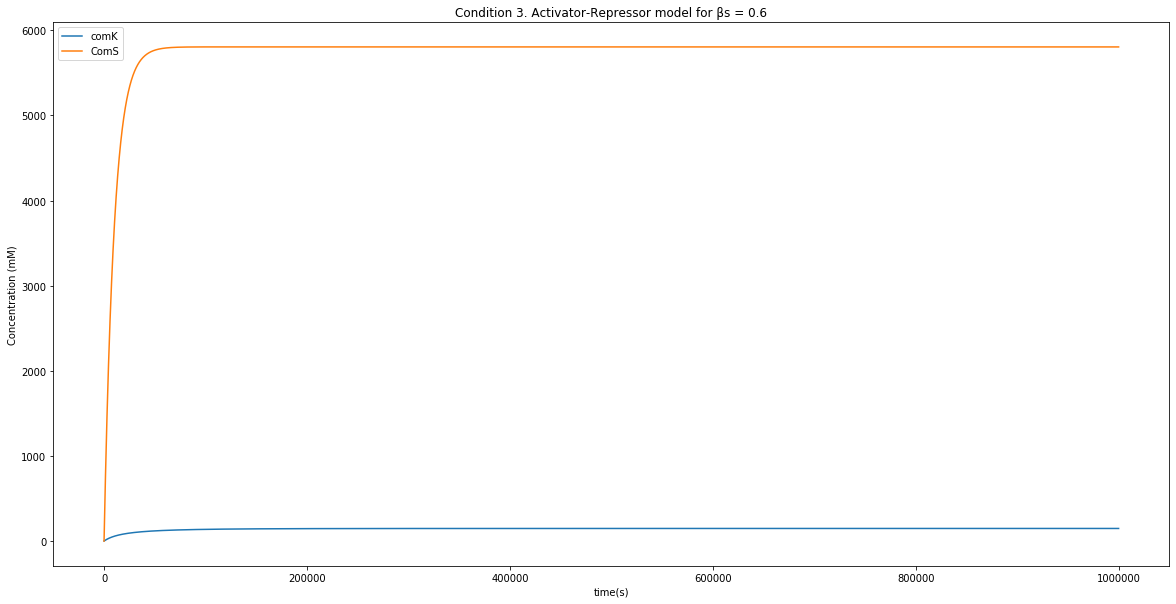

When βs = 0.6000
[ComS] tends to the value:  5803.611
[ComK] tends to the value:  148.49


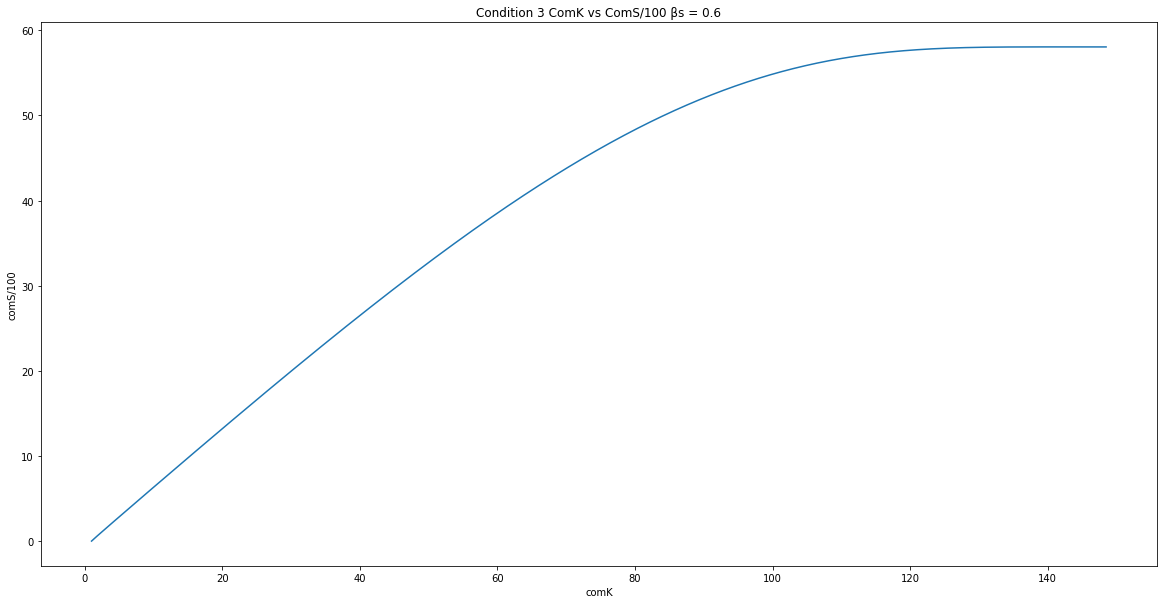

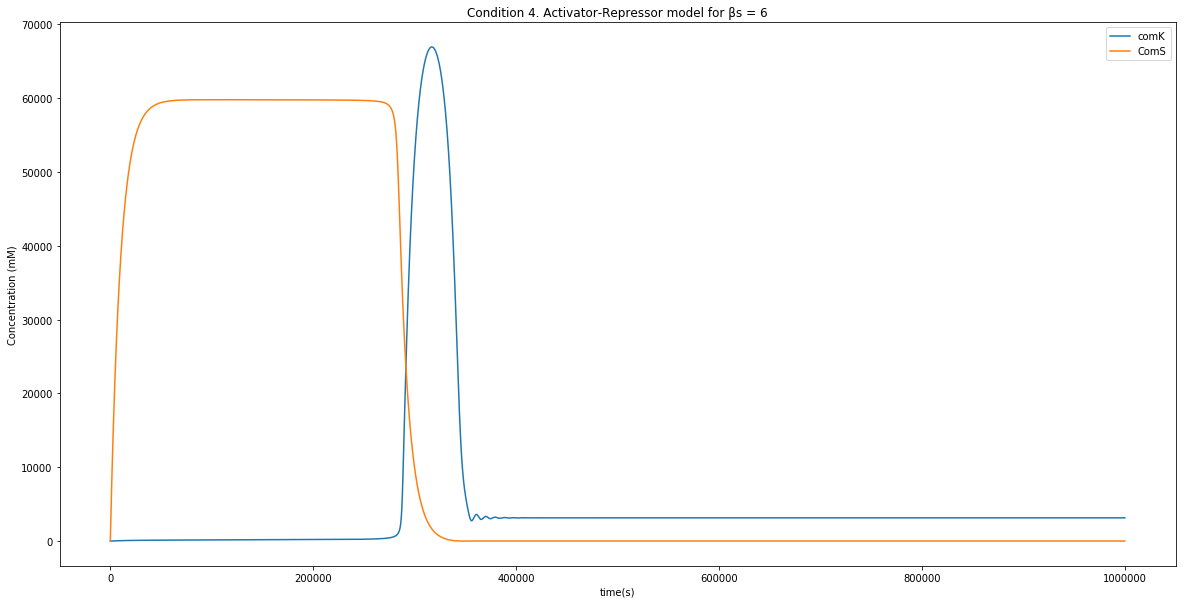

When βs = 6.0000
[ComS] tends to the value:  12.01
[ComK] tends to the value:  3149.343


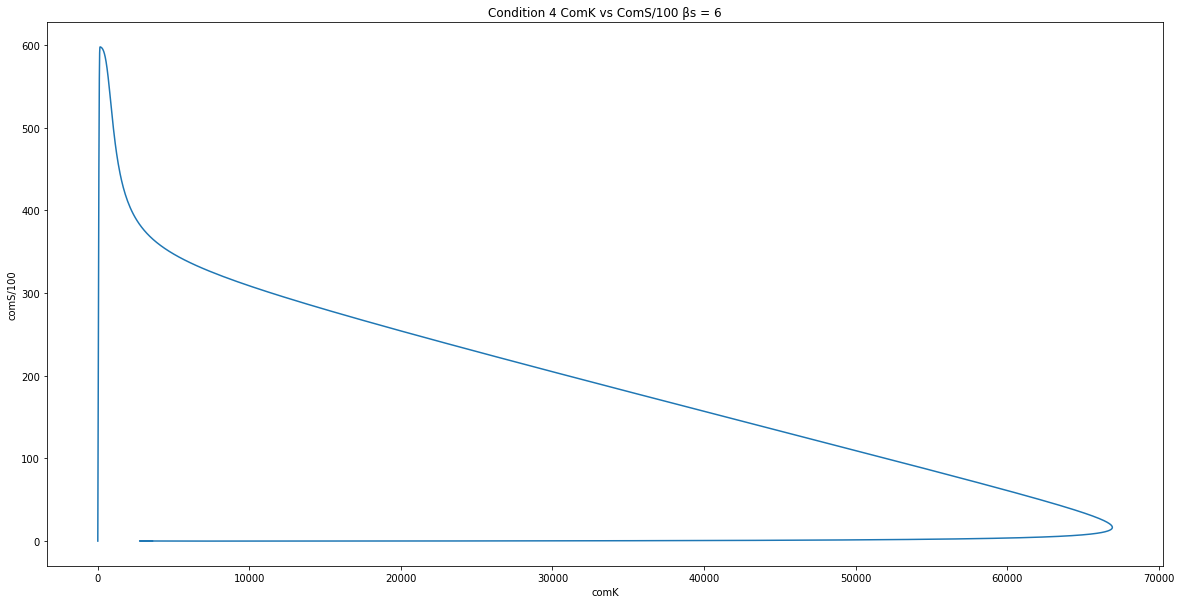

In [15]:
bs1 = [0.006, 0.06, 0.6, 6]
i = 0
for bs in bs1:
    a_s = 0.0004
    a_k = 0.00875

    y1 = odeint(dK_dS, y0, t, args=(a_k, a_s,bs))
    dK = y1[:, 0]
    dS = y1[:, 1]
    plt.plot(t, dK)
    plt.plot(t, dS)
    plt.xlabel('time(s)')
    plt.ylabel('Concentration (mM)')
    plt.legend(["comK","ComS"])
    plt.title(f'Condition {i+1}. Activator-Repressor model for βs = {bs}')
    plt.show()
    len_yS=len(dS)
    len_yK=len(dK)
    print("When βs = %.4f" %bs)
    print("[ComS] tends to the value: ", round(float(dS[len_yS-1]),3))
    print("[ComK] tends to the value: ", round(float(dK[len_yK-1]),3))

    plt.plot(dK, dS/100)
    plt.xlabel('comK')
    plt.ylabel('comS/100')
    plt.title(f'Condition {i+1} ComK vs ComS/100 βs = {bs}')

    plt.show()
    i = i + 1

Tweaking βs, we see how in the first condition, the system stays  in a state where ComK is more abundant than ComS, but as soon as βs is raised by one order of magnitude, this relationship is inverted.

The next interesting change is when βs = 6. There, note that \[Coms\] greatly surpasses \[ComK\], but then, this tendency is abruptly inverted by a short period of time, reaching an equilibrium where comK is higher.

This behaviour seems compatible with a bistable state with unstable equilibrium points at higher concentrations of ComK or ComS and one stable equilibrium point at higher concentrations of ComK.